In [67]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import plotly
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller,kpss
#import chart_studio.plotly as py
import plotly.graph_objs as go
import plotly.figure_factory as ff
import matplotlib.pyplot as plt

## Offline mode
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
#pd.options.plotting.backend = 'plotly'

In [2]:
path = '/home/sem/GIT/Energy_Proj/Project_Electricity/data/Processed/1002_processed_single_datetime.pkl'
data = pd.read_pickle(path)

In [49]:
data.index.month

Int64Index([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
            ...
            12, 12, 12, 12, 12, 12, 12, 12, 12,  1],
           dtype='int64', name='date_time', length=105216)

In [63]:
data_2016 = data[(data.index.year == 2017) & (data.index.month==2)].copy()

hourly = data_2016.resample('H')
hourly_min = hourly.min()
hourly_min.fillna(method='ffill',inplace=True)
#hourly_min = hourly_min.iloc[1:2000,:].copy()
np.all(np.isfinite(hourly_min['messwert_kwh']))

True

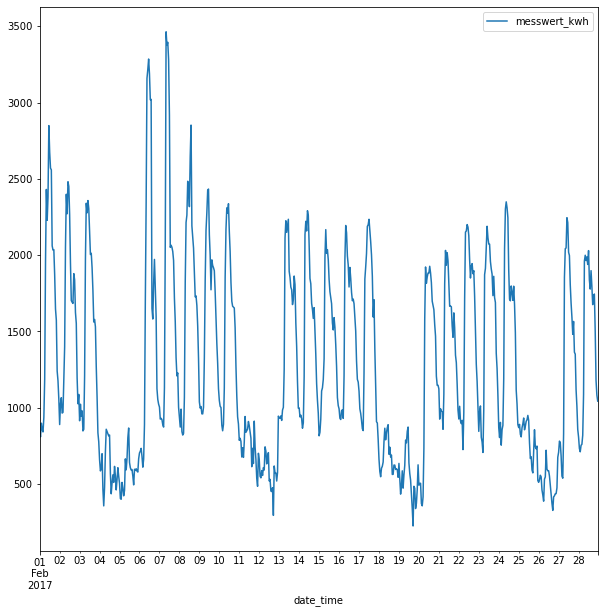

In [66]:
hourly_min.plot()

In [64]:
result_mul = seasonal_decompose(hourly_min['messwert_kwh'],
                   model='multiplicative',
                   extrapolate_trend='freq')
result_add = seasonal_decompose(hourly_min['messwert_kwh'],
                   model='additive',
                   extrapolate_trend='freq')

Text(0.5, 0.98, 'Multiplicative Decompose')

Text(0.5, 0.98, 'Additive Decompose')

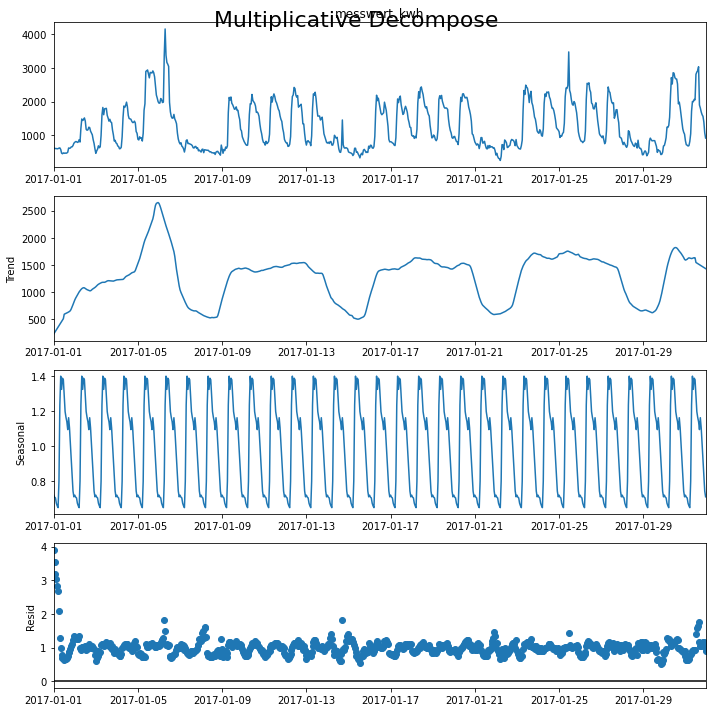

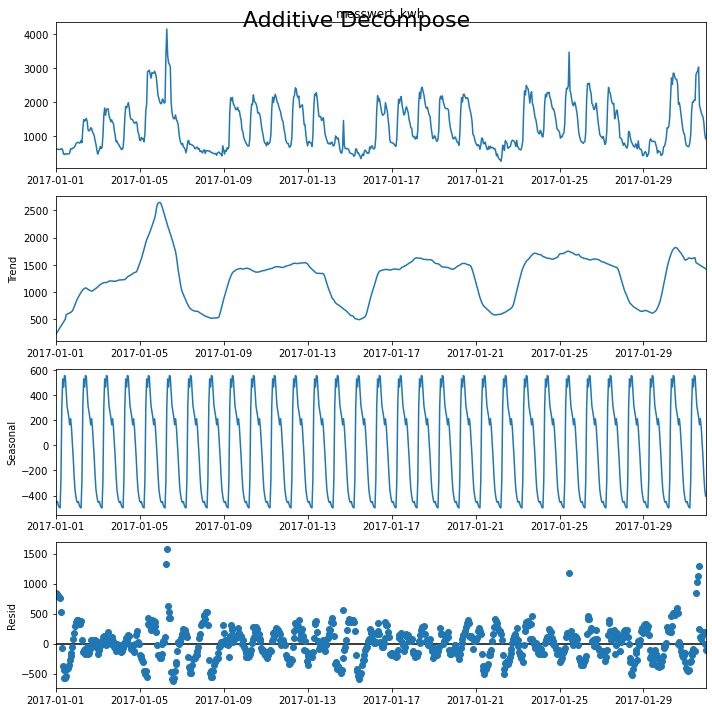

In [58]:
# Quick Plot
plt.rcParams.update({'figure.figsize': (10,10)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()

* Extract the components
* If you check the product of seas, trend and resid columns should exactly equal to the actual_values

In [65]:
df_reconstructed = pd.concat([result_add.seasonal, result_add.trend, result_add.resid, result_add.observed], axis=1)
df_reconstructed.columns = ['seas', 'trend', 'resid', 'actual_values']
df_reconstructed.head()

,seas,trend,resid,actual_values
date_time,,,,
2017-02-01 00:00:00,-461.533826,1827.910061,-525.260207,841.116028
2017-02-01 01:00:00,-484.069663,1821.861285,-528.475643,809.315979
2017-02-01 02:00:00,-477.272543,1815.812509,-439.823963,898.716003
2017-02-01 03:00:00,-499.989964,1809.763734,-452.457790,857.315979
2017-02-01 04:00:00,-518.816975,1803.714958,-443.489963,841.408020


# Testing for Stationarity 

## ADF Test
* Null hypothesis: the time series possesses a unit root and is stationary
* Reject null hypothesis if the p value is less than the significance level 0.05

In [74]:
result = adfuller(hourly_min.values,autolag='AIC')
print('ADF Statistic:{}\n p-value : {}'.format(result[0],result[1]))
for key, value in result[4].items():
    print('Critical Values:{},{}'.format(key,value))
    

ADF Statistic:-2.4036131885881247
 p-value : 0.14071920883225952
Critical Values:1%,-3.440419374623044
Critical Values:5%,-2.865983079837035
Critical Values:10%,-2.5691361169972526


## KPSS Test
* To test trend stationarity

In [73]:
result = kpss(data_2016.values,regression='c')
print('KPSS Statistic:{}\n p-value : {}'.format(result[0],result[1]))
for key, value in result[3].items():
    print('Critical Values:{},{}'.format(key,value))

KPSS Statistic:0.2008719435406451
 p-value : 0.1
Critical Values:10%,0.347
Critical Values:5%,0.463
Critical Values:2.5%,0.574
Critical Values:1%,0.739


/home/sem/miniconda3/envs/electricity/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1687: InterpolationWarning:

p-value is greater than the indicated p-value

